In [4]:
import pandas as pd
import numpy as np

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import math

In [189]:
np.random.seed(100)
N = 500 # number of data points

In [194]:
t = np.linspace(0, 4*np.pi, N)
# t = t/(max(t))
data = 15.0*np.sin(t+0.001) + 0.05 + np.random.randn(N) # create artificial data with noise
# data = 3.0*np.sin(t+100) 

In [195]:
df= pd.DataFrame({'X1':t, 'Y':data})

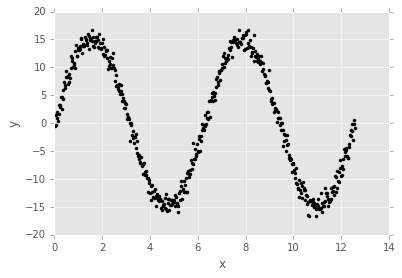

In [198]:
def plot_data(data =df):
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data()

In [ ]:
def polynomial_data(data, power):
    
    

In [14]:
import h2o
h2o.init(min_mem_size='2G')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,9 mins 31 secs
H2O cluster version:,3.10.0.10
H2O cluster version age:,3 months and 13 days !!!
H2O cluster name:,H2O_from_python_user_uv5enz
H2O cluster total nodes:,1
H2O cluster free memory:,880 Mb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [13]:
hdf= h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
hdf= h2o.H2OFrame

In [ ]:
hdf_train, hdf_validate = hdf.split_frame(ratios=[0.75], seed=10)

In [ ]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [ ]:
dl0 = H2ODeepLearningEstimator(seed =10,epochs =10, model_id='dl0')
dl0.train(x = 'x', y = 'target', training_frame=hdf_train, validation_frame=hdf_validate)

In [ ]:
dl0.plot()

In [ ]:
del(dl0)